# 🚀 Анализ эффективности интернет-магазина «Delivery Dron»

# 📋 [Содержание](#contents)
<a id="contents"></a>
## 1. 🔬 [Обработка данных](#data-processing)
- [Импорт необходимых библиотек](#import-modules)
- [Загрузка данных](#import-data)
- [Стандартизация названий столбцов](#columns)
- [Преобразование столбцов с датами в формат](#convert-datetime) `datetime`
- [Пользовательские функции](#custom-functions)
- [Предварительный осмотр данных](#preliminary-inspection)
- [Проверка уникальных значений](#inspect-unique)
- [Исправление опечатков в названиях](#fix-typos)
- [Проверка на дубликаты](#check-duplicates)
- [Исследование столбца](#promo-code) `promo_code`
- [Исследование столбца](#session-duration) `sessiondurationsec`
- [Обработка пропущенных значений](#handle-missing-values)
- [Исследование столбца](#revenue) `revenue`
- [Добавление столбца с учётом промокода](#use-promocode)
- [Добавление столбца с временем суток визита](#time-of-day)
- [Добавление столбца с информацией о платеже пользователя](#payer)
- [Определение исследуемого периода](#determine-period)
- [Проверить данные на выбросы и корректность](#check-data)
## 2. 📊 [Анализ и визуализация данных](#data-analysis)
- [Пользовательские функции](#custom-functions-2)
- [Доля продаж по **регионам**](#sales-region)
- [Доля продаж по **устройствам**](#sales-device)
- [Доля продаж по **источникам**](#sales-channel)
- [Количество платящих и не платящих пользователей по **регионам**](#sales-region-count)
- [Количество платящих и не платящих пользователей по **устройствам**](#sales-device-count)
- [Количество платящих и не платящих пользователей по **источникам**](#sales-channel-count)
- [Графики сезонности продаж](#sales-season)
- [Диаграммы количества покупок](#sales-count-diagrams)
## 3. 📐 [Проведение расчётов и вычислений](#calculations)
- [Расчет средних показателей выручки: AOV и ARPU](#average-check)
- [Среднее число покупок на пользователя](#average-purchases-per-user)
- [Средняя продолжительность по каналам](#average-channel-duration)
- [Средняя продолжительность по устройствам](#average-device-duration)
- [Топ-3 канала по чеку](#top-channel)
- [Топ-3 региона по чеку](#top-region)
- [Топ-3 месяца по чеку и регионам](#top-months-by-region)
- [MAU и топ-3 канала по месяцам](#mau-channel)
- [Таблица с метриками по каналам и лидирующим источником](#metrics-table)
## 4. 🧪 [Проверка гипотез](#hypothesis-testing)
- [Пользовательские функции](#custom-functions-3)
- [Влияние устройства на покупки по регионам](#device-impact-region)
- [Влияние каналов на покупки по регионам](#channel-impact-region)
- [Средний чек по регионам](#average-check-region)
- [Средний чек по каналам](#average-check-channel)
- [Средний чек по времени суток](#average-check-time-of-day)
- [Взаимосвязь сессии и суммы покупок](#session-duration-revenue)
- [Влияние устройства на покупку по дням в регионах (Дополнительная гипотеза)](#device-impact-daily-region)
- [Связь сессии с рекламным каналом (Дополнительная гипотеза)](#session-channel-relationship)

# 1. 🔬 Обработка данных.
<a id="obrabotka-dannykh"></a>

## Импорт необходимых библиотек.
<a id="modules-import"></a>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import os
import warnings
import matplotlib.patheffects as pe

pd.set_option('display.width', 200)
pd.set_option('future.no_silent_downcasting', True)
# pd.set_option('display.max_columns', 30)
# pd.set_option('display.max_rows', 1000)
warnings.filterwarnings("ignore", category=UserWarning)
sns.set()

## Загрузка данных. [⬆️ Назад к содержанию](#contents)
<a id="import-data"></a>

In [2]:
df = pd.read_csv('data.csv')

print("Размеры данных (количество строк и столбцов):", df.shape)
print("Названия столбцов:", df.columns.tolist())

df.head()

Размеры данных (количество строк и столбцов): (1012, 15)
Названия столбцов: ['User Id', 'Region', 'Device', 'Channel', 'Session Start', 'Session End', 'SessionDurationSec', 'Session Date', 'Month', 'Day', 'Hour of day', 'Order Dt', 'Revenue', 'Payment Type', 'Promo code']


,User Id,Region,Device,Channel,Session Start,Session End,SessionDurationSec,Session Date,Month,Day,Hour of day,Order Dt,Revenue,Payment Type,Promo code
0,529697267522,United States,iPhone,социальные сети,2019-05-01 00:06:40,2019-05-01 00:07:06,26.0,2019-05-01,5,3,0,2019-05-01 00:06:40,9999.0,Mobile payments,0.0
1,601292388085,United States,PC,organic,2019-05-01 06:56:16,2019-05-01 07:09:18,782.0,2019-05-01,5,3,7,NaN,NaN,NaN,NaN
2,852898876338,United States,Mac,социальные сети,2019-05-01 04:30:45,2019-05-01 04:34:56,251.0,2019-05-01,5,3,4,NaN,NaN,NaN,NaN
3,998513020664,United States,iPhone,социальные сети,2019-05-01 18:53:42,2019-05-01 18:57:35,233.0,2019-05-01,5,3,18,NaN,NaN,NaN,NaN
4,240702200943,United States,Mac,социальные сети,2019-05-02 14:04:32,2019-05-02 14:09:51,319.0,2019-05-02,5,4,14,NaN,NaN,NaN,NaN


## Стандартизация названий столбцов. [⬆️ Назад к содержанию](#contents)
<a id="columns"></a>

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
print("Названия столбцов:", df.columns.tolist())

Названия столбцов: ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end', 'sessiondurationsec', 'session_date', 'month', 'day', 'hour_of_day', 'order_dt', 'revenue', 'payment_type', 'promo_code']


## Преобразование столбцов с датами в формат `datetime`.  [⬆️ Назад к содержанию](#contents)
<a id="convert-datetime"></a>

In [4]:
dates = ['session_start', 'session_end', 'session_date', 'order_dt']
df[dates] = df[dates].apply(pd.to_datetime)

## Пользовательские функции. [⬆️ Назад к содержанию](#contents)
<a id="custom-functions"></a>

In [5]:
def inspect_data(df):
    print(df.info())
    
    numeric_df = df.select_dtypes(include=[np.number]) 
    print("\nСтатистические сводки для числовых столбцов:\n", numeric_df.describe())
    
    object_df = df.select_dtypes(include=['object'])
    print("\nСтатистические сводки для категориальных столбцов:\n", object_df.describe())
    
    datetime_df = df.select_dtypes(include=['datetime'])
    print("\nСтатистические сводки для столбцов с датами:\n", datetime_df.describe())

    print("\nРазмер данных:", df.shape)

def plot_missing_values(df):
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title("Тепловая карта пропущенных значений")
    plt.show()
    
def inspect_unique(df, columns=None):
    if not columns: columns = df.columns
    
    for column in columns:
        print(f"--- {column} ---")
        print(df[column].value_counts(dropna=False))
        print("\n")
        
def plot_category(df, column, save=False):
    data = df[column].fillna('unknown')
    counts = data.value_counts(dropna=False)

    plt.figure(figsize=(12,6))
    sns.barplot(x=counts.index, y=counts.values, hue=counts.index,  palette="viridis", legend=False)

    for index, value in enumerate(counts.values):
        plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f"Counts of {column}", fontsize=24)
    plt.xlabel(column.capitalize(), fontsize=14, labelpad=10)
    plt.ylabel('Count', fontsize=14)

    if save:
        folder_path = './Graphs 01/'
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)
        plt.savefig(fname=f'./Graphs 01/{column}.png', format='png', bbox_inches='tight', dpi=300)
    
    plt.show()

## Предварительный осмотр данных. [⬆️ Назад к содержанию](#contents)
<a id="preliminary-inspection"></a>

In [6]:
inspect_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             1012 non-null   int64         
 1   region              999 non-null    object        
 2   device              999 non-null    object        
 3   channel             999 non-null    object        
 4   session_start       1012 non-null   datetime64[ns]
 5   session_end         1012 non-null   datetime64[ns]
 6   sessiondurationsec  1012 non-null   float64       
 7   session_date        1012 non-null   datetime64[ns]
 8   month               1012 non-null   int64         
 9   day                 1012 non-null   int64         
 10  hour_of_day         1012 non-null   int64         
 11  order_dt            285 non-null    datetime64[ns]
 12  revenue             285 non-null    float64       
 13  payment_type        285 non-null    object      

## Проверка уникальных значений. [⬆️ Назад к содержанию](#contents)
<a id="inspect-unique"></a>

In [7]:
inspect_unique(df)

--- user_id ---
user_id
427486793654    2
588840798518    2
632186207840    2
213468351687    2
825998445466    2
               ..
890715289945    1
40547652989     1
329812499771    1
627998964297    1
204579228971    1
Name: count, Length: 998, dtype: int64


--- region ---
region
United States    535
Unjted States    144
UK               111
Germany           89
France            52
Frаnce            32
germany           13
NaN               13
Frаncе            10
Franсe             9
UК                 4
Name: count, dtype: int64


--- device ---
device
iPhone     356
Android    223
PC         206
Mac        201
android     13
NaN         13
Name: count, dtype: int64


--- channel ---
channel
социальные сети        370
organic                346
контекстная реклама    150
реклама у блогеров     101
email-рассылки          23
NaN                     13
контексная реклама       9
Name: count, dtype: int64


--- session_start ---
session_start
2019-08-25 13:21:44    2
2019-05-17 18:

## Исправление опечатков в названиях. [⬆️ Назад к содержанию](#contents)
<a id="fix-typos"></a>

In [8]:
corrections = {
    'region': {
        'Frаnce': 'France',
        'Frаncе': 'France',
        'Franсe': 'France',
        'Unjted States': 'United States',
        'germany': 'Germany',
        'UК': 'UK'
    },
    'device': {'android': 'Android'},
    'channel': {'контексная реклама': 'контекстная реклама'}
}
df.replace(corrections, inplace=True)

inspect_unique(df, columns=['region', 'device', 'channel'])

--- region ---
region
United States    679
UK               115
France           103
Germany          102
NaN               13
Name: count, dtype: int64


--- device ---
device
iPhone     356
Android    236
PC         206
Mac        201
NaN         13
Name: count, dtype: int64


--- channel ---
channel
социальные сети        370
organic                346
контекстная реклама    159
реклама у блогеров     101
email-рассылки          23
NaN                     13
Name: count, dtype: int64




## Проверка на дубликаты. [⬆️ Назад к содержанию](#contents)
<a id="check-duplicates"></a>

In [9]:
# Полные дубликаты
df[df.duplicated(keep=False)]

,user_id,region,device,channel,session_start,session_end,sessiondurationsec,session_date,month,day,hour_of_day,order_dt,revenue,payment_type,promo_code
67,768710666,United States,iPhone,реклама у блогеров,2019-05-17 18:24:36,2019-05-17 18:28:05,209.0,2019-05-17,5,5,18,2019-05-17 18:24:36,9999.0,Mobile payments,0.862715
68,768710666,United States,iPhone,реклама у блогеров,2019-05-17 18:24:36,2019-05-17 18:28:05,209.0,2019-05-17,5,5,18,2019-05-17 18:24:36,9999.0,Mobile payments,0.862715
195,134214602428,United States,Android,социальные сети,2019-06-11 02:35:48,2019-06-11 03:45:47,4199.0,2019-06-11,6,2,3,2019-06-11 02:35:48,4999.0,Mobile payments,1.000000
196,134214602428,United States,Android,социальные сети,2019-06-11 02:35:48,2019-06-11 03:45:47,4199.0,2019-06-11,6,2,3,2019-06-11 02:35:48,4999.0,Mobile payments,1.000000
599,16254498222,NaN,NaN,NaN,2019-08-25 13:21:44,2019-08-25 13:43:23,1299.0,2019-08-25,8,7,13,2019-08-25 13:21:55,4999.0,Cash,1.000000
600,16254498222,NaN,NaN,NaN,2019-08-25 13:21:44,2019-08-25 13:43:23,1299.0,2019-08-25,8,7,13,2019-08-25 13:21:55,4999.0,Cash,1.000000


### _Точные дубликаты не несут новой информации и являются избыточными, поэтому их удаление улучшает качество данных._

In [10]:
duplicates = df.duplicated().sum()
print('Количество полных дубликатов:', duplicates)
df.drop_duplicates(inplace=True)

Количество полных дубликатов: 3


## Исследование столбца `promo_code`. [⬆️ Назад к содержанию](#contents)
<a id="promo-code"></a>

In [11]:
df['promo_code'].value_counts(dropna=False)

promo_code
NaN         727
0.000000    200
1.000000     80
0.862715      2
Name: count, dtype: int64

In [12]:
# Мы замечаем два необычных значения для промокодов.
# Проверим строки с необычными значениями промокодов.

df[~df['promo_code'].isin([1, 0, np.nan])]

,user_id,region,device,channel,session_start,session_end,sessiondurationsec,session_date,month,day,hour_of_day,order_dt,revenue,payment_type,promo_code
67,768710666,United States,iPhone,реклама у блогеров,2019-05-17 18:24:36,2019-05-17 18:28:05,209.0,2019-05-17,5,5,18,2019-05-17 18:24:36,9999.0,Mobile payments,0.862715
495,12480325582,United States,Mac,социальные сети,2019-08-10 06:26:44,2019-08-10 06:49:56,1392.0,2019-08-10,8,6,6,2019-08-10 06:26:44,4999.0,E-wallet,0.862715


In [13]:
# Вроде ничего необычногов этих строках. 
# Сочтем это за ошибку в программе и округлим значения в этом столбце, 
# чтобы привести данные к ожидаемому виду.

df['promo_code'] = df['promo_code'].round()
df['promo_code'].value_counts(dropna=False)

promo_code
NaN    727
0.0    200
1.0     82
Name: count, dtype: int64

## Исследование столбца `sessiondurationsec`. [⬆️ Назад к содержанию](#contents)
<a id="session-duration"></a>

In [14]:
# Мы замечаем избыточную точность в значениях

print(df['sessiondurationsec'].unique().tolist()[:10])

[26.00000042002648, 781.9999998668209, 251.0000002104789, 232.99999977461997, 318.9999997615814, 39.99999992083758, 1380.999999702908, 1823.9999995334076, 2823.000000463798, 1655.0000002607703]


In [15]:
# Мы округлим значения продолжительности сессии и приведем их к целочисленному типу, 
# чтобы устранить избыточную точность и сделать данные более удобными и корректными для анализа.

df['sessiondurationsec'] = df['sessiondurationsec'].round().astype(int)
print(df['sessiondurationsec'].unique().tolist()[:10])

[26, 782, 251, 233, 319, 40, 1381, 1824, 2823, 1655]


## Обработка пропущенных значений. [⬆️ Назад к содержанию](#contents)
<a id="handle-missing-values"></a>

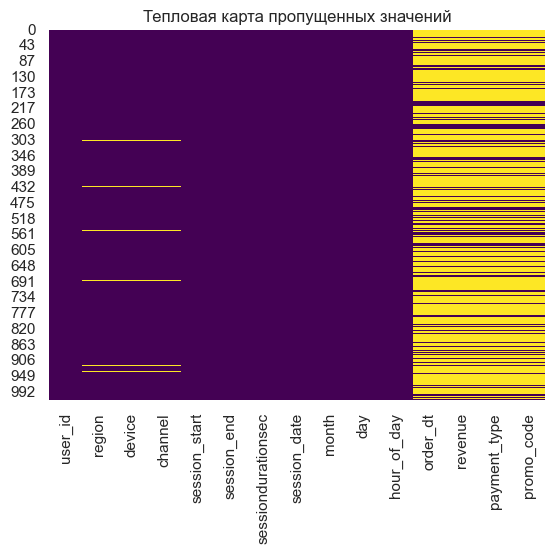

In [16]:
plot_missing_values(df)

### _Мы может заметить аномальные пропуски в столбцах region, device и channel. Пропуски в последних 4 столбцах вероятно несут определенную информацию, поэтому мы будем обрабатывать только столбцы region, device и channel._

### _Подход: в предварительном осмотре данных, мы могли заметить, что несколько пользователей посещали сайт 2 раза. Давайте рассмотрим этих пользователей детальнее._

In [17]:
user_counts = df['user_id'].value_counts()
user_ids_twice = user_counts[user_counts == 2].index

df[df['user_id'].isin(user_ids_twice)].sort_values(by=['user_id', 'session_start']).head(6)

,user_id,region,device,channel,session_start,session_end,sessiondurationsec,session_date,month,day,hour_of_day,order_dt,revenue,payment_type,promo_code
408,61219447121,UK,PC,контекстная реклама,2019-07-23 03:37:05,2019-07-23 03:43:28,383,2019-07-23,7,2,3,2019-07-23 03:37:11,4999.0,Cash,0.0
564,61219447121,NaN,NaN,NaN,2019-08-18 08:16:27,2019-08-18 08:28:59,752,2019-08-18,8,7,8,2019-08-18 08:16:33,4999.0,Cash,0.0
286,87458247642,UK,Mac,контекстная реклама,2019-06-28 16:55:35,2019-06-28 17:22:30,1615,2019-06-28,6,5,17,2019-06-28 16:55:52,4999.0,E-wallet,0.0
547,87458247642,NaN,NaN,NaN,2019-08-16 17:33:09,2019-08-16 18:02:53,1784,2019-08-16,8,5,18,2019-08-16 17:33:25,4999.0,Credit card,0.0
333,213468351687,United States,Mac,социальные сети,2019-07-05 11:58:53,2019-07-05 12:30:36,1903,2019-07-05,7,5,12,NaT,NaN,NaN,NaN
392,213468351687,NaN,NaN,NaN,2019-07-20 21:19:14,2019-07-20 21:32:09,775,2019-07-20,7,6,21,NaT,NaN,NaN,NaN


### _Заметим, что при втором посещении на сайт, значения region, device, channel не фиксируются повторно. Вероятно имеется какой-то баг в регистрирующей системе. Логичным решением будет заменить эти пропуски на значения при первом посещении на сайт._

In [18]:
r_d_c = ['region', 'device', 'channel']
df[r_d_c] = df.groupby('user_id')[r_d_c].transform(lambda x: x.ffill())

### _Проверим, остались ли еще строки с пропущенными значениями в этих столбцах._

In [19]:
df[df[r_d_c].isna().all(axis=1)]

,user_id,region,device,channel,session_start,session_end,sessiondurationsec,session_date,month,day,hour_of_day,order_dt,revenue,payment_type,promo_code
599,16254498222,NaN,NaN,NaN,2019-08-25 13:21:44,2019-08-25 13:43:23,1299,2019-08-25,8,7,13,2019-08-25 13:21:55,4999.0,Cash,1.0


### _Оказалось, у нас имеется еще один пользователь с пропущенными значениями в данных столбцах при том, что он посещал сайт всего единожды. Так как в остальных столбцах имеется важная информация, а тем более этот пользователь совершал покупку, будет нерелевантно удалять эту строку из-за пропусков. Лучшим решением будет заменить эти пропуски на моды по каждому столбцу._

In [20]:
df.fillna({col: df[col].mode()[0] for col in r_d_c}, inplace=True)
df[df[r_d_c].isna().all(axis=1)].empty

True

### _Визуализируем пропуски еще раз._

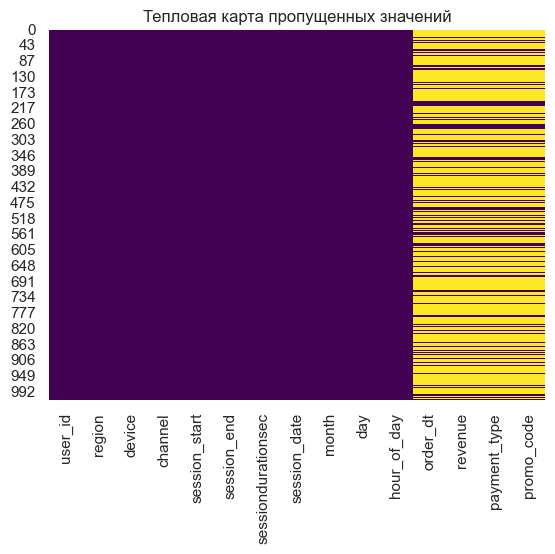

In [21]:
plot_missing_values(df)

<hr style="height: 5px; background-color: black; border: none;">

## <span style="color:red;">Важно!</span> <br>На основе анализа и рассуждений можно сделать вывод, что строки с пропущенными (NaN) значениями в этих четырех столбцах (order_dt, revenue, payment_type, promo_code) не являются случайными. Эти пропуски имеют определенный смысл и назначение. А именно, если значение отсутствует (NaN), это означает, что покупка не была совершена.

<hr style="height: 5px; background-color: black; border: none;">

## Исследование столбца `revenue`. [⬆️ Назад к содержанию](#contents)
<a id="revenue"></a>

In [22]:
df['revenue'].value_counts(dropna=False)

revenue
NaN         727
4999.0      192
5999.0       66
9999.0       18
100000.0      4
1.0           2
Name: count, dtype: int64

### _Давайте заменим значения NaN на 0, так как это не изменит основного смысла столбца, а именно, эта сессия не принесла дохода (0 значения). Также заметим, что значения 1 и 100000 явно являются аномалиями (выбросами), и их следует корректно обработать, так как они могут сильно исказить общее значение, например, среднее. Нам неизвестно, по какой причине возникли такие аномалии, поэтому мы не будем удалять строки с этими значениями. Вместо этого, мы будем более консервативными и заменим максимальное значение (100000) на следующее максимальное значение, а минимальное (1) — на следующее минимальное значение._

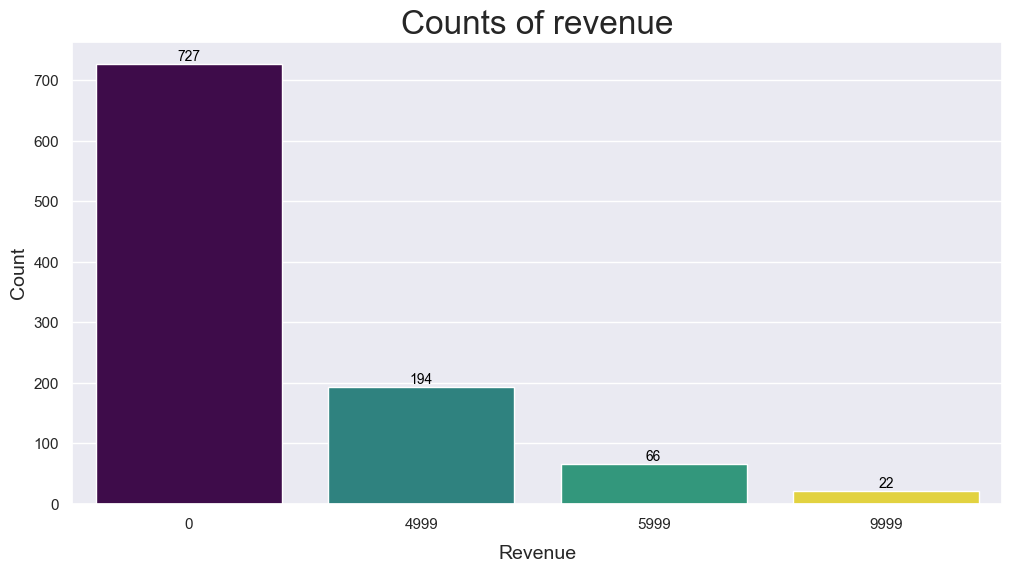

In [23]:
df['revenue'] = np.where(df['revenue'] > 9999, 9999, df['revenue'])
df['revenue'] = np.where(df['revenue'] < 4999, 4999, df['revenue'])

df['revenue'] = df['revenue'].fillna(0).astype(int)

# Визуализируем распределение доходов
plot_category(df, 'revenue', save=False)

## Добавление столбца с учётом промокода. [⬆️ Назад к содержанию](#contents)
<a id="use-promocode"></a>

`добавить столбец с итоговой суммой покупки с учетом применения промокода на скидку 10%.`

In [24]:
df['final_price'] = np.where(df['promo_code'] == 1, df['revenue'] * 0.9, df['revenue'])

## Добавление столбца с временем суток визита. [⬆️ Назад к содержанию](#contents)
<a id="time-of-day"></a>

`добавить столбец с указанием времени суток визита (утро 06:00-09:59, день 10:00-16:59, вечер 17:00-21:59, ночь 22:00-05:59).`

In [25]:
def get_time_of_day(hour):
   if 6 <= hour < 10:
       return 'morning'
   elif 10 <= hour < 17:
       return 'day'  
   elif 17 <= hour < 22:
       return 'evening'
   else:
       return 'night'

df['time_of_day'] = df['session_start'].dt.hour.map(get_time_of_day)

## Добавление столбца с информацией о платеже пользователя. <br>[⬆️ Назад к содержанию](#contents)
<a id="payer"></a>

`добавить столбец “payer” с информацией о том, является ли пользователь платящим или нет.`

### _Мы создаем столбец 'payer', проверяя столбец 'payment_type'. Если в этом столбце есть значение (не NaN), это означает, что пользователь совершил покупку. Ранее мы выяснили, что NaN в 'payment_type' указывает на отсутствие покупки. Поэтому мы проверяем, является ли значение NaN или нет, и преобразуем булевы значения в числовые: True (если покупка была) — в 1, False (если покупки не было) — в 0._

In [26]:
df['payer'] = df['payment_type'].notna().astype(int)

## Определение исследуемого периода. [⬆️ Назад к содержанию](#contents)
<a id="determine-period"></a>

# <span style="background-color:red;">????????????????????????????????????????????????????????????</span>

## Проверить данные на выбросы и корректность. [⬆️ Назад к содержанию](#contents)
<a id="check-data"></a>

# <span style="background-color:red;">????????????????????????????????????????????????????????????</span>

# 2. 📊 Анализ и визуализация данных.
<a id="data-analysis"></a>

## Пользовательские функции. [⬆️ Назад к содержанию](#contents)
<a id="custom-functions-2"></a>

In [27]:
def plot_sales(df, value_column='payer', group_column='region', annot_size=30, normalize=True):
    grouped = df.groupby(group_column)[value_column].value_counts(normalize=normalize).unstack().round(2).T
    
    fmt = '.0%' if normalize else '.0f'
    vmin = 0 if normalize else None
    vmax = 1 if normalize else None
    cmap = 'RdYlGn_r' if normalize else 'RdYlGn'
    path_effects = [
        pe.Stroke(linewidth=3, foreground='black'),
        pe.Normal()
    ]
    
    plt.figure(figsize=(10,6))
    sns.heatmap(grouped, annot=True, cmap=cmap, square=True, fmt=fmt, cbar=False,
                vmin=vmin, vmax=vmax, annot_kws={'size': annot_size, 'weight': 'bold', 
                'color': 'white', 'family': 'cursive', 'rotation': 0, 'path_effects': path_effects})

    plt.gca().xaxis.set_ticks_position('top')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

## Доля продаж по регионам. [⬆️ Назад к содержанию](#contents)
<a id="sales-region"></a>

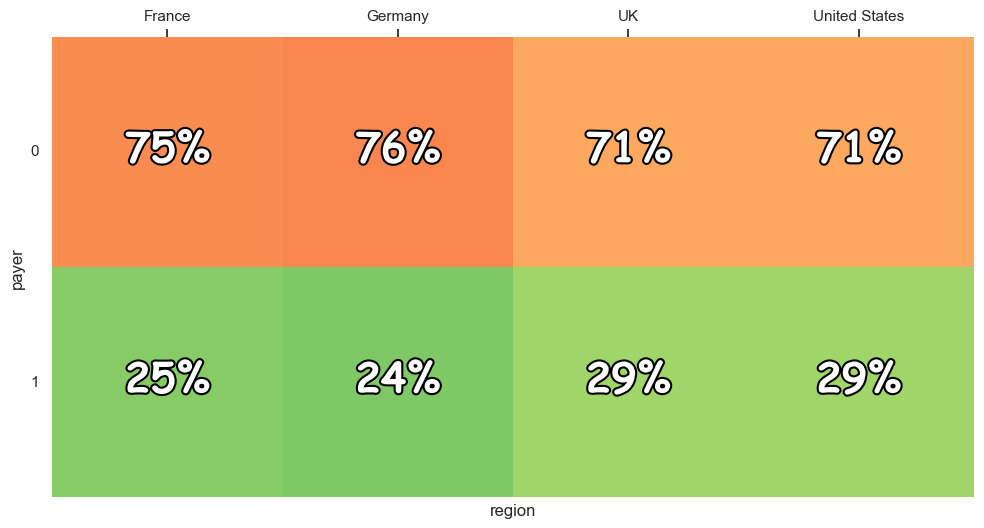

In [28]:
plot_sales(df, group_column='region')

## Доля продаж по устройствам. [⬆️ Назад к содержанию](#contents)
<a id="sales-device"></a>

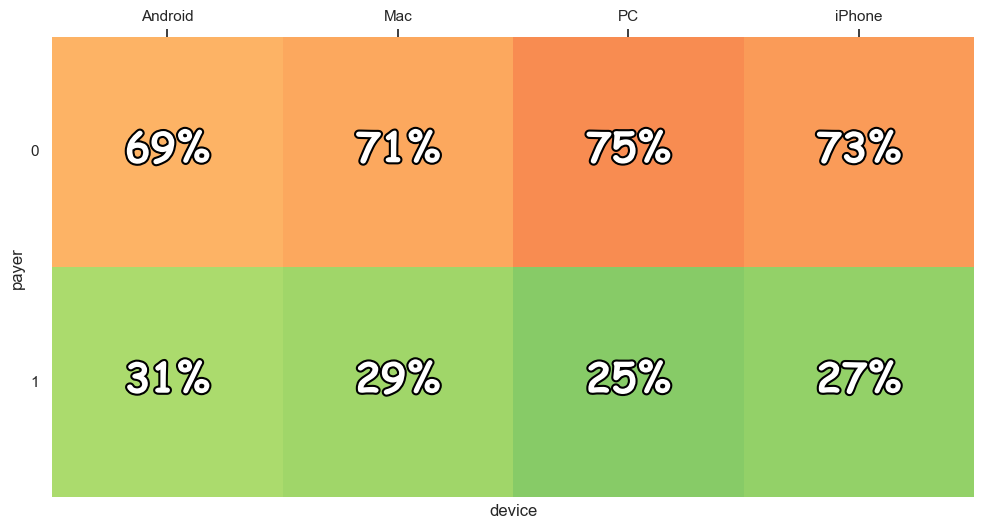

In [29]:
plot_sales(df, group_column='device')

## Доля продаж по источникам. [⬆️ Назад к содержанию](#contents)
<a id="sales-channel"></a>

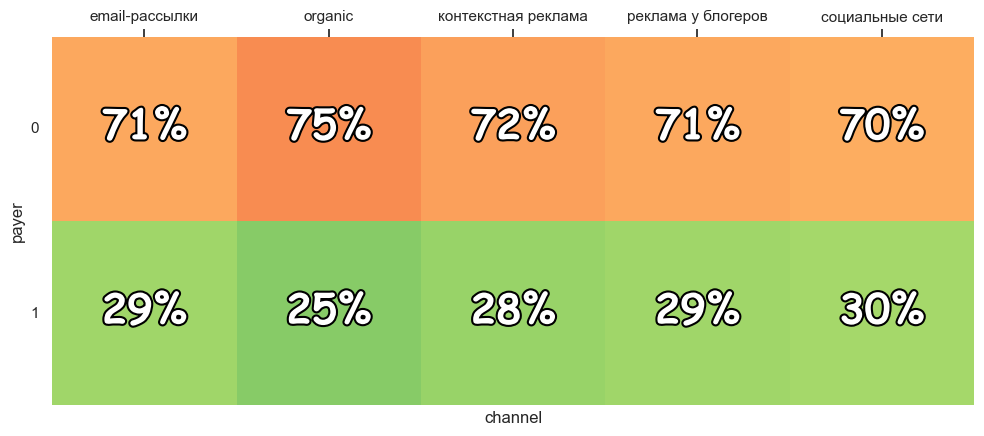

In [30]:
plot_sales(df, group_column='channel')

## Количество платящих и не платящих пользователей по регионам. <br>[⬆️ Назад к содержанию](#contents)
<a id="sales-region-count"></a>

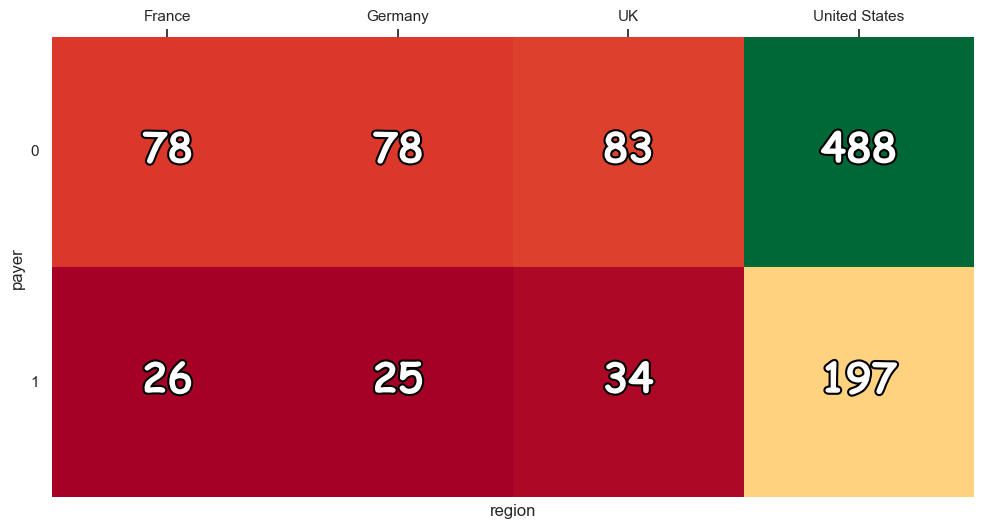

In [31]:
plot_sales(df, group_column='region', normalize=False)

## Количество платящих и не платящих пользователей по устройствам. <br>[⬆️ Назад к содержанию](#contents)
<a id="sales-device-count"></a>

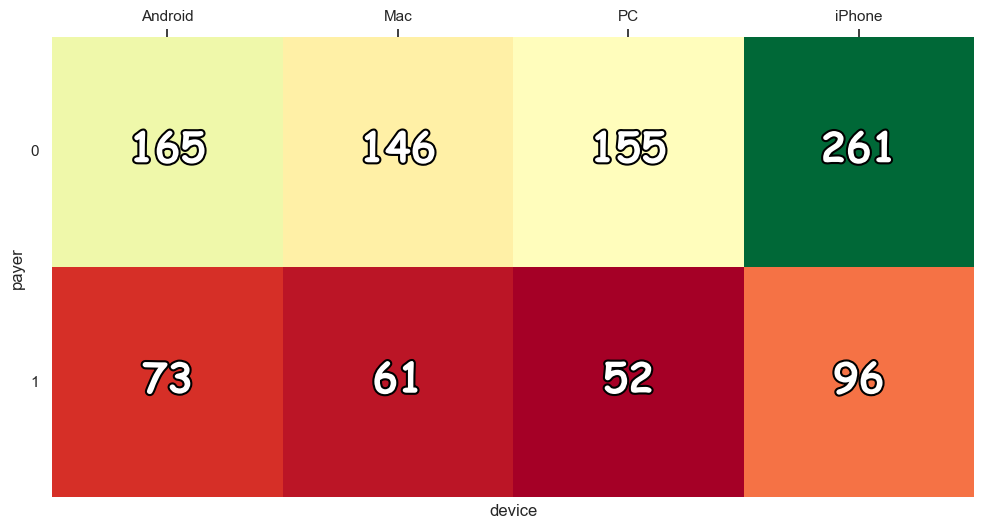

In [32]:
plot_sales(df, group_column='device', normalize=False)

## Количество платящих и не платящих пользователей по источникам. <br>[⬆️ Назад к содержанию](#contents)
<a id="sales-channel-count"></a>

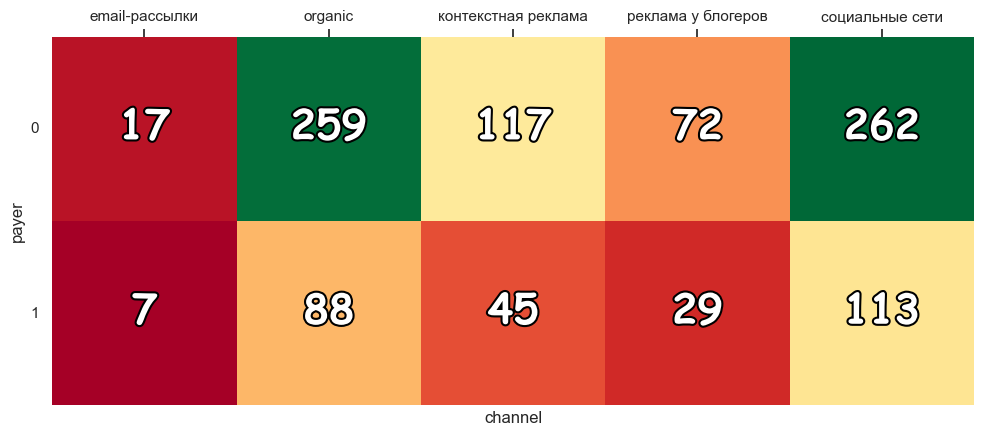

In [33]:
plot_sales(df, group_column='channel', normalize=False)

## Графики сезонности продаж. [⬆️ Назад к содержанию](#contents)
<a id="sales-season"></a>

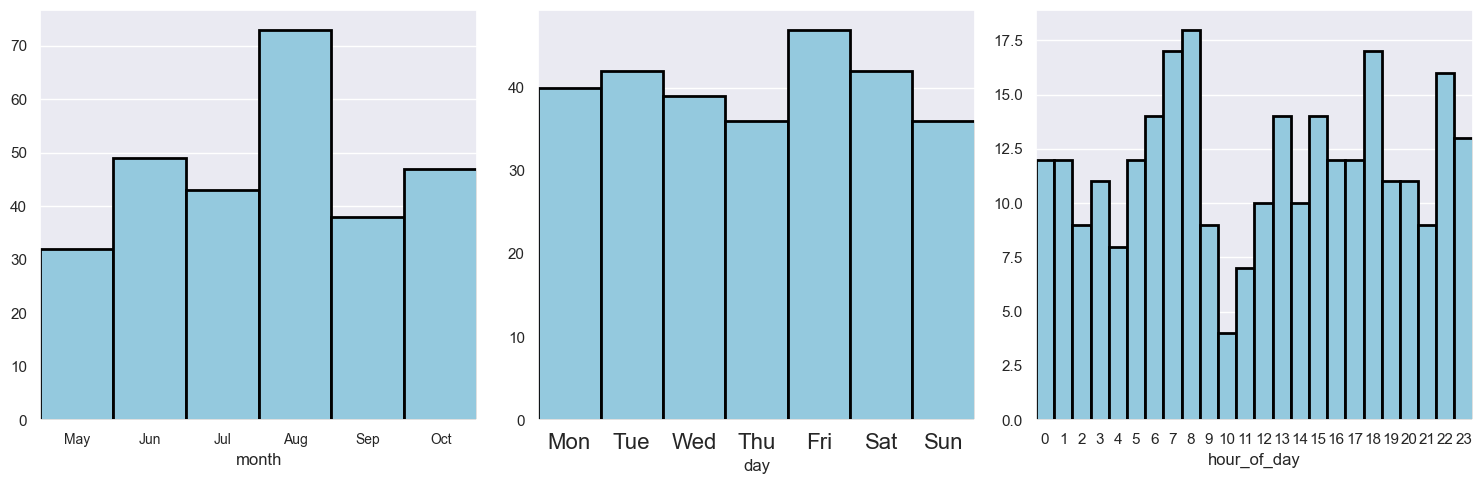

In [34]:
def analyze_time_series(df):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    # Monthly
    monthly_sales = df[df['payer']==1]['month'].value_counts().sort_index()
    sns.barplot(x=monthly_sales.index, y=monthly_sales.values, ax=ax1, width=1,
                edgecolor="black", linewidth=2, color="skyblue")

    ax1.set_xticks(range(len(range(5, 11))))
    ax1.set_xticklabels(['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], size=16)
    ax1.tick_params(axis='x', labelsize=10)
    
    # Weekday
    weekday_sales = df[df['payer']==1]['day'].value_counts().sort_index()
    sns.barplot(x=weekday_sales.index, y=weekday_sales.values, ax=ax2, width=1,
               edgecolor="black", linewidth=2, color="skyblue")
    ax2.set_xticks(range(7))
    ax2.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], size=16)
    
    # Hourly
    hourly_sales = df[df['payer']==1]['hour_of_day'].value_counts().sort_index()
    sns.barplot(x=hourly_sales.index, y=hourly_sales.values, ax=ax3, width=1,
               edgecolor="black", linewidth=2, color="skyblue")

    plt.tight_layout()
    plt.show()

analyze_time_series(df)

## Диаграммы количества покупок. [⬆️ Назад к содержанию](#contents)
<a id="sales-count-diagrams"></a>

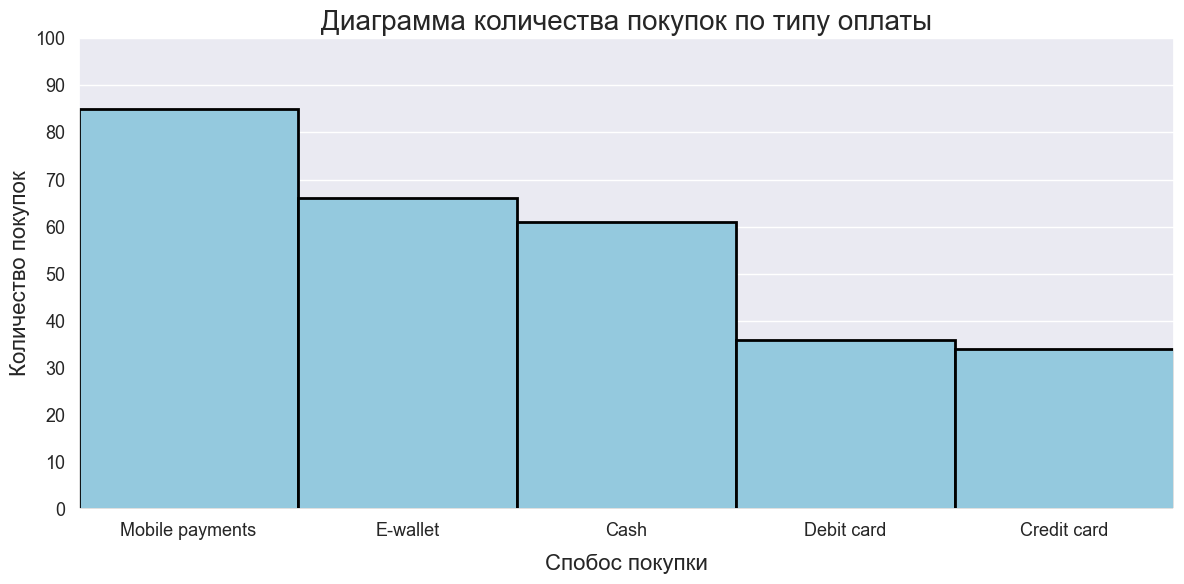

In [35]:
def plot_distribution(df, factor='payment_type'):
    plt.figure(figsize=(12, 6))
    counts = df[factor].value_counts()
    total_count = df[factor].count()

    sns.barplot(x=counts.index, y=counts.values, width=1, edgecolor="black", linewidth=2, color="skyblue")
    plt.yticks(np.arange(0, 101, 10), size=13)
    plt.xticks(size=13)
    plt.xlabel('Спобос покупки', size=16, labelpad=10)
    plt.ylabel('Количество покупок', size=16)
    plt.title('Диаграмма количества покупок по типу оплаты', size=20)
    plt.tight_layout()
    plt.show()
    
plot_distribution(df)

# 3. 📐 Проведение расчётов и вычислений
<a id="calculations"></a>

## Расчет средних показателей выручки: AOV и ARPU. [⬆️ Назад к содержанию](#contents)
<a id="average-check"></a>

`Рассчитать средний чек.`

### _При анализе эффективности интернет-магазина рассчитываем два ключевых показателя:_
</br>
<div style="text-align: center;">
$AOV = \frac{\text{Общая выручка}}{\text{Количество заказов}}$ и $ARPU = \frac{\text{Общая выручка}}{\text{Количество уникальных пользователей}}$
</div>

### _AOV (Average Order Value) показывает средний чек одного заказа, ARPU (Average Revenue Per User) - среднюю выручку с каждого пользователя. Оба метрика критически важны для понимания монетизации бизнеса._

In [36]:
def calculate_average_revenue(df):
    total_revenue = df['revenue'].sum()
    total_orders = df['payer'].sum()
    total_users = df['user_id'].nunique()
    
    AOV = (total_revenue / total_orders).round().astype(int)
    ARPU = (total_revenue / total_users).round().astype(int)
    
    print(f"Ключевые метрики выручки:")
    print(f"🔹 Общая выручка: ${total_revenue:,.0f}")
    print(f"🔹 Количество заказов: {total_orders:,.0f}")
    print(f"🔹 Количество уникальных пользователей: {total_users:,.0f}")
    print(f"📈 Средний чек (AOV): ${AOV:,.0f}")
    print(f"📊 Выручка на пользователя (ARPU): ${ARPU:,.0f}")
    
    return AOV, ARPU

AOV, ARPU = calculate_average_revenue(df)

Ключевые метрики выручки:
🔹 Общая выручка: $1,585,718
🔹 Количество заказов: 282
🔹 Количество уникальных пользователей: 998
📈 Средний чек (AOV): $5,623
📊 Выручка на пользователя (ARPU): $1,589


## Среднее число покупок на пользователя. [⬆️ Назад к содержанию](#contents)
<a id="average-purchases-per-user"></a>

`Сколько покупок в среднем совершает 1 пользователь?`

### _При анализе поведения пользователей мы столкнулись с дилеммой: как наиболее корректно вычислить среднее количество покупок? Существует два принципиально разных подхода, каждый из которых несет свою аналитическую ценность:_

### 1. Расчет по всем пользователям
- Почему? Этот метод позволяет оценить общий потенциал бизнеса
- Что показывает? Реальную конверсию и долю активных покупателей среди всех посетителей
- Практическая польза: Демонстрирует необходимость работы над привлечением и удержанием клиентов

### 2. Расчет только по платящим пользователям
- Почему? Фокус на поведении целевой аудитории, уже совершившей покупку
- Что показывает? Лояльность и готовность клиентов совершать повторные покупки
- Практическая польза: Оценка потенциала для кросс-селлинга и удержания клиентов

### Использование двух методов дает многогранную картину потребительского поведения, позволяя не упустить важные аналитические нюансы.

In [40]:
def calculate_purchases_per_user(df):
    # Первый подход: среднее по всем пользователям
    total_purchases = df['payer'].sum()
    total_users = df['user_id'].nunique()
    avg_per_total_user = round(total_purchases / total_users, 2)
    
    # Второй подход: среднее по платящим пользователям
    paid_users = df[df['payer'] == 1]['user_id'].nunique()
    avg_per_paid_user = round(total_purchases / paid_users, 2)
    
    print("🛍️ Анализ покупок:")
    print(f"🔹 Общее количество покупок: {total_purchases}")
    print(f"🔹 Всего уникальных пользователей: {total_users}")
    print(f"🔹 Количество платящих пользователей: {paid_users}")
    print(f"📊 Покупок на всех пользователей: {avg_per_total_user}")
    print(f"💰 Покупок на платящих пользователей: {avg_per_paid_user}")
    
    return avg_per_total_user, avg_per_paid_user

_ = calculate_purchases_per_user(df)

🛍️ Анализ покупок:
🔹 Общее количество покупок: 282
🔹 Всего уникальных пользователей: 998
🔹 Количество платящих пользователей: 277
📊 Покупок на всех пользователей: 0.28
💰 Покупок на платящих пользователей: 1.02


## Средняя продолжительность по каналам. [⬆️ Назад к содержанию](#contents)
<a id="average-channel-duration"></a>

`Рассчитать среднюю продолжительность сессии по рекламным каналам.`

### _При работе с временными данными мы столкнулись с необходимостью перевода секунд в более удобную для восприятия единицу измерения — минуты. Изначально данные о продолжительности сессий были представлены в секундах, что затрудняло быструю интерпретацию._

In [46]:
def calculate_avg_duration_by_channel(df):
    avg_duration = df.groupby('channel')['sessiondurationsec'].mean() // 60
    
    print("🕰️ Средняя продолжительность сессий по рекламным каналам:")
    for channel, duration in avg_duration.items():
        print(f"📡 {channel}: {duration:.0f} мин")

calculate_avg_duration_by_channel(df)

🕰️ Средняя продолжительность сессий по рекламным каналам:
📡 email-рассылки: 33 мин
📡 organic: 31 мин
📡 контекстная реклама: 32 мин
📡 реклама у блогеров: 31 мин
📡 социальные сети: 28 мин


## Средняя продолжительность по устройствам. [⬆️ Назад к содержанию](#contents)
<a id="average-device-duration"></a>

`Рассчитать среднюю продолжительность сессии по типу устройства.`

In [47]:
def calculate_avg_duration_by_device(df):
    avg_duration = df.groupby('device')['sessiondurationsec'].mean() // 60
    
    print("🖥️ Средняя продолжительность сессий по типам устройств:")
    for device, duration in avg_duration.items():
        print(f"💻 {device}: {duration:.0f} мин")

calculate_avg_duration_by_device(df)

🖥️ Средняя продолжительность сессий по типам устройств:
💻 Android: 31 мин
💻 Mac: 29 мин
💻 PC: 32 мин
💻 iPhone: 28 мин


## Топ-3 канала по чеку. [⬆️ Назад к содержанию](#contents)
<a id="top-channel"></a>

`Определить топ-3 рекламных канала по среднему чеку.`

In [49]:
def top_channels(df):
    paid_users_df = df[df['revenue'] > 0]
    
    aov_by_channel = (paid_users_df.groupby('channel')['revenue']
                      .mean()
                      .round()
                      .astype(int)
                      .sort_values(ascending=False))
    
    print("💰 Топ-3 рекламных канала по среднему чеку:")
    for i, (channel, avg_check) in enumerate(aov_by_channel.head(3).items(), 1):
        print(f"🏆 {i} место: {channel} - ${avg_check}")

top_channels(df)

💰 Топ-3 рекламных канала по среднему чеку:
🏆 1 место: реклама у блогеров - $5792
🏆 2 место: organic - $5692
🏆 3 место: социальные сети - $5663


## Топ-3 региона по чеку. [⬆️ Назад к содержанию](#contents)
<a id="top-region"></a>

`Определить топ-3 региона по среднему чеку.`

In [53]:
def top_regions(df):
    paid_users_df = df[df['revenue'] > 0]

    aov_by_region = (paid_users_df.groupby('region')['revenue']
                     .mean()
                     .round()
                     .astype(int)
                     .sort_values(ascending=False))

    print("🌍 Топ-3 региона по среднему чеку:")
    for i, (region, avg_check) in enumerate(aov_by_region.head(3).items(), 1):
        print(f"🏆 {i} место: {region} - ${avg_check}")
   
top_regions(df)

🌍 Топ-3 региона по среднему чеку:
🏆 1 место: UK - $5734
🏆 2 место: France - $5730
🏆 3 место: United States - $5608


## Топ-3 месяца по чеку и регионам. [⬆️ Назад к содержанию](#contents)
<a id="top-months-by-region"></a>

`Определить топ-3 месяца по среднему чеку с разбивкой по регионам.`

In [59]:
month_names = {
   1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель', 
   5: 'Май', 6: 'Июнь', 7: 'Июль', 8: 'Август', 
   9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'
}

In [60]:
def top_3_months_by_avg_check_per_region(df):
    paid_users_df = df[df['revenue'] > 0]

    monthly_avg_check = (
       paid_users_df
       .groupby(['region', 'month'])
       .agg(avg_check=('revenue', 'mean'))
       .reset_index()
    )

    monthly_avg_check['avg_check'] = monthly_avg_check['avg_check'].round().astype(int)

    top_3_months = (
       monthly_avg_check
       .sort_values(['region', 'avg_check'], ascending=[True, False])
       .groupby('region')
       .head(3)
    )

    top_3_months['month_name'] = top_3_months['month'].map(month_names)

    print("📊 Топ-3 месяца по среднему чеку в разрезе регионов:")
    for region in top_3_months['region'].unique():
        print(f"\n🌍 {region}:")
        region_data = top_3_months[top_3_months['region'] == region]
        for i, (_, row) in enumerate(region_data.iterrows(), 1):
            print(f"🏆 {i} место: {row['month_name']} - ${row['avg_check']}")

    return top_3_months

top_3_months = top_3_months_by_avg_check_per_region(df)

📊 Топ-3 месяца по среднему чеку в разрезе регионов:

🌍 France:
🏆 1 место: Май - $7999
🏆 2 место: Июнь - $5570
🏆 3 место: Октябрь - $5332

🌍 Germany:
🏆 1 место: Июль - $7499
🏆 2 место: Июнь - $5799
🏆 3 место: Сентябрь - $5249

🌍 UK:
🏆 1 место: Май - $7999
🏆 2 место: Октябрь - $6142
🏆 3 место: Август - $5635

🌍 United States:
🏆 1 место: Май - $6477
🏆 2 место: Август - $5713
🏆 3 место: Июнь - $5666


## MAU и топ-3 канала по месяцам. [⬆️ Назад к содержанию](#contents)
<a id="mau-channel"></a>

`Посчитать MAU по каждому месяцу с разбивкой по рекламным каналам и выделить топ-3 рекламных каналов по количеству уникальных пользователей в месяц.`

In [64]:
def calculate_mau_by_channel(df):
    mau_by_channel = (
       df.groupby(['month', 'channel'])['user_id']
       .nunique()
       .reset_index(name='unique_users')
    )

    top_3_channels = (
       mau_by_channel
       .sort_values(['month', 'unique_users'], ascending=[True, False])
       .groupby('month')
       .head(3)
    )
    
    top_3_channels['month_name'] = top_3_channels['month'].map(month_names)

    print("📊 Топ-3 рекламных канала по количеству уникальных пользователей в месяц:")
    for month in top_3_channels['month_name'].unique():
        print(f"\n🗓️ Месяц {month}:")
        month_data = top_3_channels[top_3_channels['month_name'] == month]
        for i, (_, row) in enumerate(month_data.iterrows(), 1):
            print(f"🏆 {i} место: {row['channel']} - {row['unique_users']} пользователей")
   
    return top_3_channels

top_3_channels = calculate_mau_by_channel(df)

📊 Топ-3 рекламных канала по количеству уникальных пользователей в месяц:

🗓️ Месяц Май:
🏆 1 место: organic - 76 пользователей
🏆 2 место: социальные сети - 41 пользователей
🏆 3 место: реклама у блогеров - 14 пользователей

🗓️ Месяц Июнь:
🏆 1 место: organic - 59 пользователей
🏆 2 место: социальные сети - 53 пользователей
🏆 3 место: контекстная реклама - 28 пользователей

🗓️ Месяц Июль:
🏆 1 место: социальные сети - 57 пользователей
🏆 2 место: organic - 46 пользователей
🏆 3 место: контекстная реклама - 24 пользователей

🗓️ Месяц Август:
🏆 1 место: социальные сети - 69 пользователей
🏆 2 место: organic - 61 пользователей
🏆 3 место: контекстная реклама - 37 пользователей

🗓️ Месяц Сентябрь:
🏆 1 место: социальные сети - 67 пользователей
🏆 2 место: organic - 58 пользователей
🏆 3 место: контекстная реклама - 38 пользователей

🗓️ Месяц Октябрь:
🏆 1 место: социальные сети - 85 пользователей
🏆 2 место: organic - 47 пользователей
🏆 3 место: контекстная реклама - 27 пользователей


## Таблица с метриками по каналам и лидирующим источником. <br>[⬆️ Назад к содержанию](#contents)
<a id="metrics-table"></a>

`Составить таблицу в которой будет указано по рекламным каналам: количество пользователей, количество уникальных пользователей, количество платящих пользователей, сумма продаж и определить какой источник “принес” больше всего платящих пользователей и большую сумму продаж.`

In [72]:
def analyze_channel_performance(df):
    channel_performance = df.groupby('channel').agg(
        total_users_count=('user_id', 'count'),
        unique_users=('user_id', 'nunique'),
        paying_users=('user_id', lambda x: x[df.loc[x.index, 'payer'] == 1].nunique()),
        total_sales=('revenue', 'sum')
    )

    channel_performance['paying_users_rank'] = channel_performance['paying_users'].rank(method='dense', ascending=False)
    channel_performance['total_sales_rank'] = channel_performance['total_sales'].rank(method='dense', ascending=False)

    top_paying_users_channel = channel_performance.sort_values('paying_users', ascending=False).index[0]
    top_sales_channel = channel_performance.sort_values('total_sales', ascending=False).index[0]

    print("📊 Анализ эффективности рекламных каналов:")
    print("\n🔍 Детальная статистика по каналам:")
    for channel, row in channel_performance.iterrows():
        print(f"\n📡 Канал: {channel}")
        print(f"👥 Общее количество пользователей: {row['total_users_count']:.0f}")
        print(f"🆔 Уникальные пользователи: {row['unique_users']:.0f}")
        print(f"💰 Платящие пользователи: {row['paying_users']:.0f} (Ранг: {row['paying_users_rank']:.0f})")
        print(f"💵 Общая сумма продаж: ${row['total_sales']:,.0f} (Ранг: {row['total_sales_rank']:.0f})")

    print("\n🏆 Ключевые выводы:")
    print(f"🥇 Канал с наибольшим числом платящих пользователей: {top_paying_users_channel}")
    print(f"💎 Канал с наибольшой суммой продаж: {top_sales_channel}")

    return channel_performance

channel_performance = analyze_channel_performance(df)

📊 Анализ эффективности рекламных каналов:

🔍 Детальная статистика по каналам:

📡 Канал: email-рассылки
👥 Общее количество пользователей: 24
🆔 Уникальные пользователи: 23
💰 Платящие пользователи: 6 (Ранг: 5)
💵 Общая сумма продаж: $37,993 (Ранг: 5)

📡 Канал: organic
👥 Общее количество пользователей: 347
🆔 Уникальные пользователи: 346
💰 Платящие пользователи: 87 (Ранг: 2)
💵 Общая сумма продаж: $500,912 (Ранг: 2)

📡 Канал: контекстная реклама
👥 Общее количество пользователей: 162
🆔 Уникальные пользователи: 159
💰 Платящие пользователи: 42 (Ранг: 3)
💵 Общая сумма продаж: $238,955 (Ранг: 3)

📡 Канал: реклама у блогеров
👥 Общее количество пользователей: 101
🆔 Уникальные пользователи: 100
💰 Платящие пользователи: 29 (Ранг: 4)
💵 Общая сумма продаж: $167,971 (Ранг: 4)

📡 Канал: социальные сети
👥 Общее количество пользователей: 375
🆔 Уникальные пользователи: 370
💰 Платящие пользователи: 113 (Ранг: 1)
💵 Общая сумма продаж: $639,887 (Ранг: 1)

🏆 Ключевые выводы:
🥇 Канал с наибольшим числом платящих 

<hr style="height: 5px; background-color: black; border: none;">

# 4. 🧪 Проверка гипотез
<a id="hypothesis-testing"></a>

## 🔬 Этапы исследования

### 1. Проверка нормальности
- Тест Шапиро-Уилка
- KDE plot
- Визуальная оценка распределения

### 2. Выбор статистического теста
- Нормальное распределение → параметрические тесты (t-test, ANOVA)
- Ненормальное распределение → непараметрические тесты (Mann-Whitney U test, Kruskal-Wallis H test)

### 3. Формулировка гипотез
- H0: Нет статистически значимых различий
- H1: Существуют статистически значимые различия

### 4. Статистическое тестирование
- Расчет p-value
- Сравнение с уровнем значимости α = 0.05

### 5. Post-hoc анализ
- Попарные сравнения
- Поправка на множественные сравнения

### 6. Интерпретация результатов
- Принятие/отклонение нулевой гипотезы

## ⚖️ Критерии оценки

`α = 0.05`  
`p-value < 0.05 → отклонить H₀`  
`p-value ≥ 0.05 → не отклонять H₀`

<hr style="height: 5px; background-color: black; border: none;">

## Пользовательские функции. [⬆️ Назад к содержанию](#contents)
<a id="custom-functions-3"></a>

In [80]:
def normality_test(df, group_columns=['region', 'device', 'session_date'], target_column='payer'):
    grouped = df.groupby(group_columns)[target_column].sum().reset_index()
    grouped.rename(columns={target_column: 'daily_purchases'}, inplace=True)

    plt.figure(figsize=(12,6))
    sns.kdeplot(grouped, x='daily_purchases', hue=group_columns[0], fill=True)

    print("🔬 Результаты теста Шапиро-Уилка:")
    for group in grouped[group_columns[0]].unique():
        group_data = grouped[grouped[group_columns[0]] == group]['daily_purchases']
        statistic, p_value = stats.shapiro(group_data)

        status = "✅ Нормальное" if p_value > 0.05 else "❌ Ненормальное"
        print(f"{group}: p-value = {p_value} | {status}")

<hr style="height: 5px; background-color: black; border: none;">

## Влияние устройства на покупки по регионам. [⬆️ Назад к содержанию](#contents)
<a id="device-impact-region"></a>

`Влияет ли тип устройства на количество покупок в день по каждому региону?`

🔬 Результаты теста Шапиро-Уилка:
France: p-value = 3.535860432523009e-16 | ❌ Ненормальное
Germany: p-value = 1.3211037098502413e-15 | ❌ Ненормальное
UK: p-value = 2.7564709916866203e-15 | ❌ Ненормальное
United States: p-value = 6.495640408149409e-27 | ❌ Ненормальное


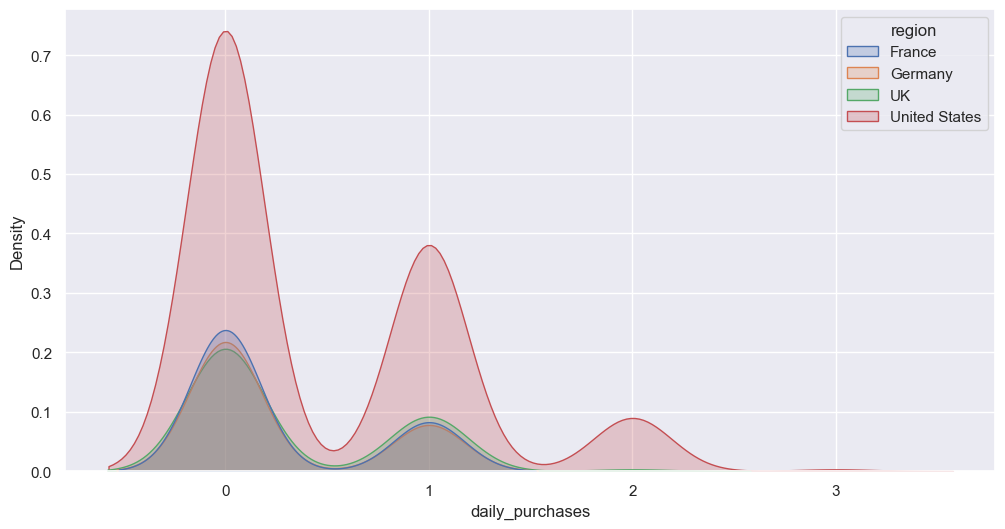

In [86]:
normality_test(df, group_columns=['region', 'device', 'session_date'])

### _Результаты теста Шапиро-Уилка показывают, что распределение количества покупок по дням для всех регионов (Франция, Германия, Великобритания, США) является статистически значимо отличным от нормального распределения. Низкие p-value (< 0.05) во всех случаях указывают на ненормальное распределение данных._
> Следствие: Мы будем использовать непараметрический тест Kruskal–Wallis для сравнения групп.

In [84]:
def test_hypothesis_device_impact(df, alpha=0.05):
    grouped = df.groupby(['region', 'device', 'session_date'])['payer'].sum().reset_index()
    grouped.rename(columns={'payer': 'daily_purchases'}, inplace=True)
    
    results = {}
    print("🔍 Результаты теста Краскела-Уоллиса:")
    
    for region in df['region'].unique():
        region_data = grouped[grouped['region'] == region]
        groups = [group['daily_purchases'].values for device, group in region_data.groupby('device')]
        
        stat, p_value = stats.kruskal(*groups)
        
        status = "✅ Значимые различия" if p_value < alpha else "❌ Нет значимых различий"
        results[region] = {
            'statistic': stat, 
            'p_value': p_value, 
            'status': status
        }
        
        print(f"{region}: p-value = {p_value:.4f} | {status}")

test_hypothesis_device_impact(df)

🔍 Результаты теста Краскела-Уоллиса:
United States: p-value = 0.3308 | ❌ Нет значимых различий
France: p-value = 0.1911 | ❌ Нет значимых различий
Germany: p-value = 0.6412 | ❌ Нет значимых различий
UK: p-value = 0.7585 | ❌ Нет значимых различий


## 🔍 Результаты гипотезы о влиянии устройств на покупки:
- 📊 Во всех регионах (США, Франция, Германия, Великобритания) статистически значимых различий в количестве покупок между типами устройств не обнаружено.
- 🚫 Нулевая гипотеза не отвергается: тип устройства не влияет существенно на количество покупок в день.
- 🔑 Ключевой вывод: Пользователи совершают примерно одинаковое количество покупок независимо от типа устройства.

<hr style="height: 5px; background-color: black; border: none;">

## Влияние каналов на покупки по регионам. [⬆️ Назад к содержанию](#contents)
<a id="channel-impact-region"></a>

`Влияет ли тип рекламного канала на количество покупок в день по каждому региону?`

🔬 Результаты теста Шапиро-Уилка:
France: p-value = 2.2988170659926374e-15 | ❌ Ненормальное
Germany: p-value = 3.702049171617313e-15 | ❌ Ненормальное
UK: p-value = 4.312893156913889e-15 | ❌ Ненормальное
United States: p-value = 3.6089853521507336e-24 | ❌ Ненормальное


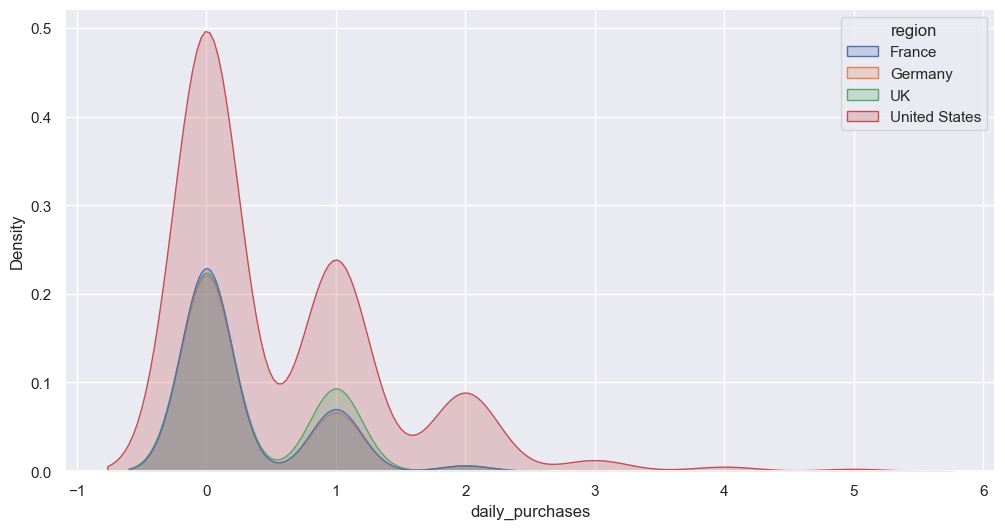

In [85]:
normality_test(df, group_columns=['region', 'channel', 'session_date'])

### _Результаты теста Шапиро-Уилка демонстрируют, что распределение количества покупок по дням для всех регионов не соответствует нормальному распределению (p-value << 0.05)._
> Следствие: Будем использовать непараметрический тест Kruskal–Wallis для сравнения групп.

In [87]:
def test_hypothesis_channel_impact(df, alpha=0.05):
    grouped = df.groupby(['region', 'channel', 'session_date'])['payer'].sum().reset_index()
    grouped.rename(columns={'payer': 'daily_purchases'}, inplace=True)
    
    results = {}
    print("🔍 Результаты теста Краскела-Уоллиса:")
    
    for region in df['region'].unique():
        region_data = grouped[grouped['region'] == region]
        groups = [group['daily_purchases'].values for channel, group in region_data.groupby('channel')]
        
        stat, p_value = stats.kruskal(*groups)
        
        status = "✅ Значимые различия" if p_value < alpha else "❌ Нет значимых различий"
        results[region] = {
            'statistic': stat, 
            'p_value': p_value, 
            'status': status
        }
        
        print(f"{region}: p-value = {p_value:.4f} | {status}")
    
test_hypothesis_channel_impact(df)

🔍 Результаты теста Краскела-Уоллиса:
United States: p-value = 0.0255 | ✅ Значимые различия
France: p-value = 0.1264 | ❌ Нет значимых различий
Germany: p-value = 0.9515 | ❌ Нет значимых различий
UK: p-value = 0.7749 | ❌ Нет значимых различий


## 🔬 Статистический анализ влияния каналов на покупки:
## 📊 Результаты теста Краскела-Уоллиса (H-критерий):
- `США: p = 0.0255 (α < 0.05)` ✅
- `Друге регионы: p > 0.05` ❌
## 🎯 Выводы:
- Только в США обнаружены статистически значимые различия в количестве покупок между рекламными каналами
- В Германии, Франции и Великобритании влияние канала на покупки статистически не подтверждено
### 🔑 Ключевой инсайт: Эффективность рекламных каналов существенно варьируется в зависимости от региона, с наиболее выраженными различиями в США.

### _Поскольку в США обнаружены статистически значимые различия между каналами (p = 0.0255), мы проводим post-hoc тест Тьюки._

### 🎯 Цель post-hoc анализа:
- Идентифицировать конкретные пары каналов с существенными различиями
- Определить, какие именно каналы статистически значимо отличаются по количеству покупок

In [89]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def post_hoc_us_channels(df, alpha=0.05):
    us_data = df[df['region'] == 'United States']
    grouped = us_data.groupby(['channel', 'session_date'])['payer'].sum().reset_index()

    tukey_results = pairwise_tukeyhsd(grouped['payer'], grouped['channel'])

    tukey_df = pd.DataFrame(
       data=tukey_results._results_table.data[1:], 
       columns=tukey_results._results_table.data[0]
    )

    print("🔍 Post-hoc анализ (тест Тьюки):")
    significant_pairs = tukey_df[tukey_df['reject'] == True]

    if not significant_pairs.empty:
        print("📊 Статистически значимые различия между каналами:")
        for _, row in significant_pairs.iterrows():
            print(f"• {row['group1']} vs {row['group2']}: p = {row['p-adj']:.4f}")
    else:
        print("❌ Значимых попарных различий не обнаружено")

    return tukey_df

post_hoc_us_channels(df)

🔍 Post-hoc анализ (тест Тьюки):
📊 Статистически значимые различия между каналами:
• реклама у блогеров vs социальные сети: p = 0.0247


,group1,group2,meandiff,p-adj,lower,upper,reject
0,organic,контекстная реклама,-0.1818,0.8082,-0.7071,0.3435,False
1,organic,реклама у блогеров,-0.2294,0.4445,-0.6269,0.1681,False
2,organic,социальные сети,0.2000,0.1568,-0.0465,0.4466,False
3,контекстная реклама,реклама у блогеров,-0.0476,0.9970,-0.6540,0.5588,False
4,контекстная реклама,социальные сети,0.3819,0.2318,-0.1382,0.9020,False
5,реклама у блогеров,социальные сети,0.4295,0.0247,0.0389,0.8201,True


### _Тест Тьюки показал статистически значимое различие между рекламой у блогеров и социальными сетями (p = 0.0247)._

<hr style="height: 5px; background-color: black; border: none;">

## Средний чек по регионам. [⬆️ Назад к содержанию](#contents)
<a id="average-check-region"></a>

`Проверить гипотезу о том, что средний чек отличается в зависимости от региона?`

`H0: Средний чек во всех регионах одинаков.`  
`H1: Средний чек различается между регионами.`

In [93]:
def check_revenue_by_region(df):
    groups = [group.values for region, group in df.query('revenue > 0').groupby('region')['revenue']]
    h_statistic, p_value = stats.kruskal(*groups)

    status = "✅ Значимые различия" if p_value < 0.05 else "❌ Нет значимых различий"
    print(f"p-value = {p_value:.4f} | {status}")

check_revenue_by_region(df)

p-value = 0.4795 | ❌ Нет значимых различий


### _Нулевая гипотеза о равенстве среднего чека по регионам не отвергается (p-value = 0.4795). Статистически значимых различий в выручке между регионами не обнаружено. Это означает, что выручка в разных регионах существенно не отличается, и при планировании маркетинговой стратегии следует учитывать другие факторы, а не региональные различия._

<hr style="height: 5px; background-color: black; border: none;">

## Средний чек по каналам. [⬆️ Назад к содержанию](#contents)
<a id="average-check-channel"></a>

`Проверить гипотезу о том, что средний чек отличается в зависимости от рекламного канала?`

`H0: Средний чек одинаков по всем рекламным каналам.`  
`H1: Средний чек различается между рекламными каналами.`

In [95]:
def check_revenue_by_channel(df):
    revenue_by_channel = [group.values for channel, group in df.query('revenue > 0').groupby('channel')['revenue']]
    h_statistic, p_value = stats.kruskal(*revenue_by_channel)
    
    status = "✅ Значимые различия" if p_value < 0.05 else "❌ Нет значимых различий"
    print(f"p-value = {p_value:.4f} | {status}")

check_revenue_by_channel(df)

p-value = 0.5468 | ❌ Нет значимых различий


### _Нулевая гипотеза о равенстве среднего чека по рекламным каналам не отвергается (p-value = 0.5468). Статистически значимых различий в выручке между каналами не обнаружено._

<hr style="height: 5px; background-color: black; border: none;">

## Средний чек по времени суток. [⬆️ Назад к содержанию](#contents)
<a id="average-check-time-of-day"></a>

`Проверить гипотезу о том, что средний чек отличается в зависимости от времени суток?`

`H0: Средний чек одинаков во все времена суток.`  
`H1: Средний чек различается в зависимости от времени суток.`

In [96]:
def check_revenue_by_time_of_day(df):
    revenue_by_time = [group.values for time_of_day, group in df.query('revenue > 0').groupby('time_of_day')['revenue']]
    h_statistic, p_value = stats.kruskal(*revenue_by_time)
    
    status = "✅ Значимые различия" if p_value < 0.05 else "❌ Нет значимых различий"
    print(f"p-value = {p_value:.4f} | {status}")

check_revenue_by_time_of_day(df)

p-value = 0.2137 | ❌ Нет значимых различий


### _Нулевая гипотеза о равенстве среднего чека по времени суток не отвергается (p-value = 0.2137). Статистически значимых различий в выручке между временами суток не обнаружено._

<hr style="height: 5px; background-color: black; border: none;">

## Взаимосвязь сессии и суммы покупок. [⬆️ Назад к содержанию](#contents)
<a id="session-duration-revenue"></a>

`Есть ли взаимосвязь между продолжительностью сессии с суммой покупок?`

`H0: Нет взаимосвязи между продолжительностью сессии и суммой покупок.`  
`H1: Существует взаимосвязь между продолжительностью сессии и суммой покупок.`

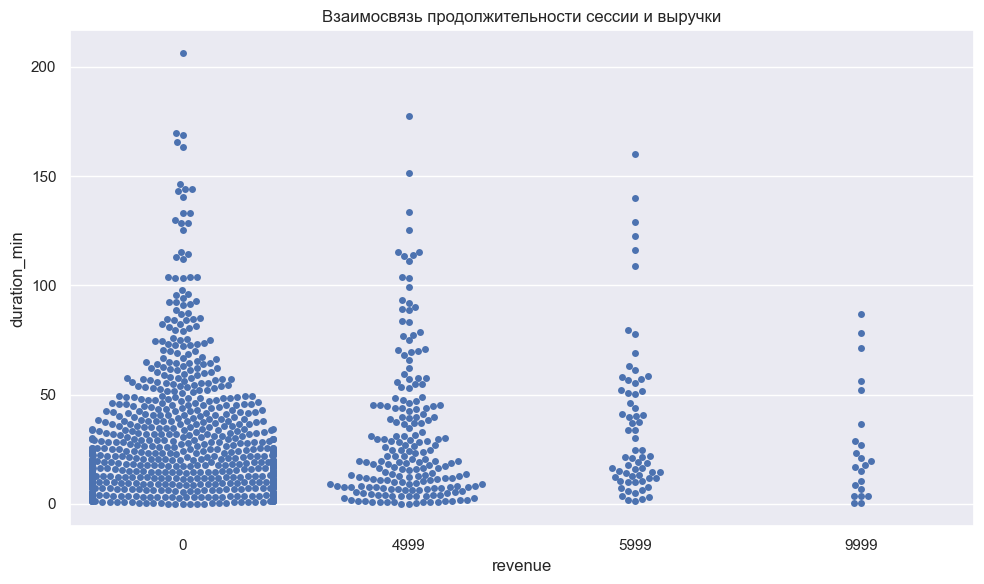

Корреляция Спирмена: r = 0.03, p-value = 0.3518


In [99]:
def check_duration_revenue_corr(data):
    df = data.copy()
    df['duration_min'] = df['sessiondurationsec'] / 60

    corr, p_value = stats.spearmanr(df['sessiondurationsec'], df['revenue'])

    plt.figure(figsize=(10, 6))
    sns.swarmplot(x='revenue', y='duration_min', data=df)
    plt.title('Взаимосвязь продолжительности сессии и выручки')
    plt.tight_layout()
    plt.show()

    print(f'Корреляция Спирмена: r = {corr:.2f}, p-value = {p_value:.4f}')

check_duration_revenue_corr(df)

### _Корреляционный анализ Спирмена показал отсутствие статистически значимой связи между продолжительностью сессии и суммой покупок (p-value = 0.3518, корреляция r = незначимая). Длительность сессии не влияет на величину выручки._

<hr style="height: 5px; background-color: black; border: none;">

## Влияние устройства на покупку по дням в регионах (Дополнительная гипотеза). <br>[⬆️ Назад к содержанию](#contents)
<a id="device-impact-daily-region"></a>

`Влияет ли тип устройства на совершение покупки в определенный день (Да или Нет) в каждом регионе?`

`H0: Тип устройства не влияет на вероятность совершения покупки в определенный день в каждом регионе.`  
`H1: Тип устройства значимо влияет на вероятность совершения покупки в определенный день в каждом регионе.`

In [101]:
def analyze_device_purchase_impact(df):
    grouped = df.groupby(['region', 'device', 'session_date'])['payer'].sum().reset_index()
    grouped.rename(columns={'payer': 'daily_purchases'}, inplace=True)
    grouped['purchase_made'] = grouped['daily_purchases'].apply(lambda x: 1 if x > 0 else 0)
    
    for region in df['region'].unique():
        region_data = grouped[grouped['region'] == region]
        
        crosstab = pd.crosstab(region_data['device'], region_data['purchase_made'])
        chi2, p_value, dof, expected = stats.chi2_contingency(crosstab)
        
        print(f"🌍 Регион: {region}")
        print(f"📊 Таблица сопряженности:")
        print(crosstab)
        print(f"📈 p-значение: {round(p_value, 6)}")
        
        if p_value < 0.05:
            print("✅ Результат: Статистически значимая связь ОБНАРУЖЕНА!")
            print("🔍 Тип устройства влияет на совершение покупок в этом регионе")
        else:
            print("❌ Результат: Статистически значимой связи НЕ ОБНАРУЖЕНО")
            print("🤝 Тип устройства не оказывает существенного влияния на покупки")
        
        print("\n" + "="*50 + "\n")

analyze_device_purchase_impact(df)

🌍 Регион: United States
📊 Таблица сопряженности:
purchase_made   0   1
device               
Android        59  42
Mac            70  38
PC             44  21
iPhone         84  63
📈 p-значение: 0.378244
❌ Результат: Статистически значимой связи НЕ ОБНАРУЖЕНО
🤝 Тип устройства не оказывает существенного влияния на покупки


🌍 Регион: France
📊 Таблица сопряженности:
purchase_made   0   1
device               
Android        21   8
Mac             8   6
PC             28  10
iPhone         18   2
📈 p-значение: 0.187342
❌ Результат: Статистически значимой связи НЕ ОБНАРУЖЕНО
🤝 Тип устройства не оказывает существенного влияния на покупки


🌍 Регион: Germany
📊 Таблица сопряженности:
purchase_made   0  1
device              
Android        17  7
Mac            11  3
PC             27  7
iPhone         15  8
📈 p-значение: 0.637253
❌ Результат: Статистически значимой связи НЕ ОБНАРУЖЕНО
🤝 Тип устройства не оказывает существенного влияния на покупки


🌍 Регион: UK
📊 Таблица сопряженности:
purcha

### _По результатам статистического анализа во всех четырех регионах (США, Франция, Германия, Великобритания) тип устройства не оказывает статистически значимого влияния на совершение покупок в день. Значения p-value для всех регионов превышают допустимый порог 0.05, что свидетельствует о независимости покупок от типа устройства, используемого пользователем в определенный день._

<hr style="height: 5px; background-color: black; border: none;">

## Связь сессии с рекламным каналом (Дополнительная гипотеза). <br>[⬆️ Назад к содержанию](#contents)
<a id="session-channel-relationship"></a>

`Есть ли взаимосвязь между продолжительностью сессии с рекламным каналом?`

`H0: Длительность сессии не различается между рекламными каналами.`  
`H1: Длительность сессии статистически значимо различается по рекламным каналам.`

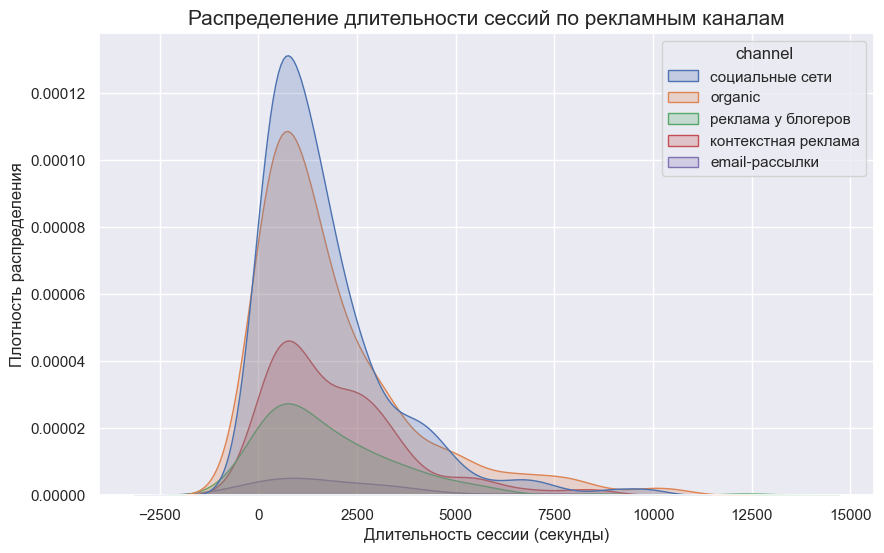

In [104]:
def plot_duration_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x='sessiondurationsec', hue='channel', fill=True)
    plt.title('Распределение длительности сессий по рекламным каналам', fontsize=15)
    plt.xlabel('Длительность сессии (секунды)', fontsize=12)
    plt.ylabel('Плотность распределения', fontsize=12)
    plt.show()
    
plot_duration_distribution(df)

### _Отсюда у меня возникает вопрос, а не следует ли оно Гамма распределению?  Проверим с помощью критерия Колмогорова-Смирнова._

`H0: sessiondurationsec следует Гамма распределению.`  
`H1: sessiondurationsec не следует Гамма распределению.`

In [106]:
def verify_gamma_distribution(df):
    shape, loc, scale = stats.gamma.fit(df['sessiondurationsec'])
    ks_stat, p_value = stats.kstest(df['sessiondurationsec'], "gamma", args=(shape, loc, scale))
    
    print(f"📊 Критерий Колмогорова-Смирнова для гамма-распределения:")
    print(f"Статистика KS: {ks_stat:.6f}")
    print(f"P-значение: {p_value:.6f}")
    
    if p_value > 0.05:
        print("✅ Гипотеза о гамма-распределении подтверждается")
    else:
        print("❌ Гипотеза о гамма-распределении отвергается")

verify_gamma_distribution(df)

📊 Критерий Колмогорова-Смирнова для гамма-распределения:
Статистика KS: 0.021538
P-значение: 0.728961
✅ Гипотеза о гамма-распределении подтверждается


### _Это явно говорит нам о том, что данные распределены не нормально, следовательно нам придется использовать непараметрические тесты._

In [108]:
def test_duration_channel_corr(df):
    groups = [group.values for channel, group in df.groupby('channel')['sessiondurationsec']]
    stat, p_value = stats.kruskal(*groups)
    
    print("🔍 Результаты теста Краскела-Уоллиса:")
    print(f"Статистика теста: {stat}")
    print(f"P-значение: {p_value}")
    
    if p_value < 0.05:
        print("✅ Обнаружена статистически значимая взаимосвязь")
        print("Длительность сессии РАЗЛИЧАЕТСЯ в зависимости от рекламного канала")
    else:
        print("❌ Статистически значимой взаимосвязи НЕ ОБНАРУЖЕНО")
        print("Длительность сессии НЕ ЗАВИСИТ от рекламного канала")
        
test_duration_channel_corr(df)

🔍 Результаты теста Краскела-Уоллиса:
Статистика теста: 4.054572217448947
P-значение: 0.3986706808188171
❌ Статистически значимой взаимосвязи НЕ ОБНАРУЖЕНО
Длительность сессии НЕ ЗАВИСИТ от рекламного канала


<hr style="height: 5px; background-color: black; border: none;">

In [ ]:
# df.groupby(['region', 'channel', 'device', 'month']).size().unstack().unstack()